In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['reviews.csv']


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
import datetime
%matplotlib inline 
import seaborn as sns

In [3]:
df=pd.read_csv('../input/reviews.csv')
df.head(6)
df.dtypes

listing_id     int64
date          object
dtype: object

In [4]:
##convert date column from object data type to datetime format
df['date']=pd.to_datetime(df['date'],format='%Y.%m.%d')


In [5]:
df=df.rename(columns={'listing_id':'TS'})

In [6]:
df['TS'].isnull().value_counts()

False    1369095
Name: TS, dtype: int64

In [7]:
train=df.groupby(['date'],as_index=False)['TS'].count()
train.tail()

,date,TS
3284,2019-05-02,668
3285,2019-05-03,696
3286,2019-05-04,560
3287,2019-05-05,377
3288,2019-05-06,1


In [8]:
##since this is a time series data we can set the index as the date
train=train.set_index(['date'])

In [9]:
train.head()

,TS
date,
2009-05-26,1
2009-06-24,1
2009-07-17,1
2009-07-23,1
2009-07-26,1


In [10]:
##Testing frequency 1
train = train.asfreq(freq='1D')

# Sort the values
train = train.sort_index(ascending = True)

#train = train.fillna(value = 0)

train.dropna(inplace=True)


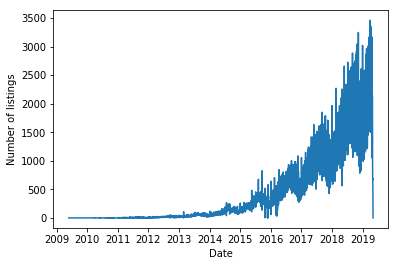

In [11]:
plt.xlabel("Date")
plt.ylabel("Number of listings")
plt.plot(train)


                     TS
date                   
2009-05-26          NaN
2009-06-24          NaN
2009-07-17          NaN
2009-07-23          NaN
2009-07-26          NaN
2009-08-02          NaN
2009-08-13          NaN
2009-08-23          NaN
2009-08-30          NaN
2009-08-31          NaN
2009-09-02          NaN
2009-09-03     1.000000
2009-09-08     1.000000
2009-09-09     1.000000
2009-09-23     1.083333
2009-09-24     1.083333
2009-10-08     1.083333
2009-10-12     1.083333
2009-10-19     1.083333
2009-10-20     1.083333
2009-10-27     1.083333
2009-11-01     1.083333
2009-11-08     1.083333
2009-11-12     1.083333
2009-11-24     1.166667
2009-12-18     1.166667
2010-01-03     1.083333
2010-01-06     1.083333
2010-01-09     1.166667
2010-01-12     1.166667
...                 ...
2019-04-07  2066.500000
2019-04-08  2110.666667
2019-04-09  2088.250000
2019-04-10  2047.416667
2019-04-11  2039.083333
2019-04-12  1896.583333
2019-04-13  1839.333333
2019-04-14  1990.916667
2019-04-15  2082

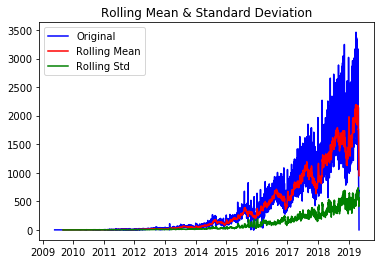

In [12]:
rolmean=train.rolling(window=12).mean()
rolstd=train.rolling(window=12).std()
print(rolmean,rolstd)
orig=plt.plot(train,color='blue',label='Original')
mean=plt.plot(rolmean,color='red',label='Rolling Mean')
std=plt.plot(rolstd,color='green',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6


######Don't use this code it will give an error that not values cannot be passed.
print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    

In [14]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    #rolmean = pd.rolling_mean(timeseries, window=12)
    #rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    dftest = adfuller(timeseries['TS'], 
                      autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], 
                         index = ['Test Statistic',
                                  'p-value',
                                  '# Lags Used',
                                  'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

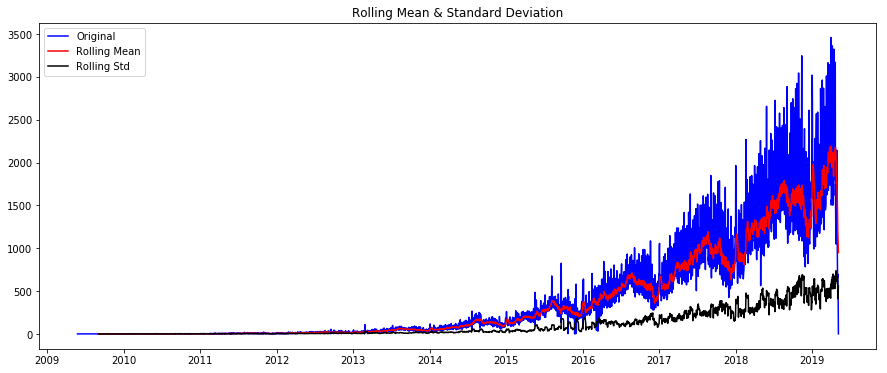

Test Statistic                   -1.772375
p-value                           0.394260
# Lags Used                      29.000000
Number of Observations Used    3259.000000
Critical Value (1%)              -3.432358
Critical Value (5%)              -2.862427
Critical Value (10%)             -2.567242
dtype: float64


In [15]:
test_stationarity(train)

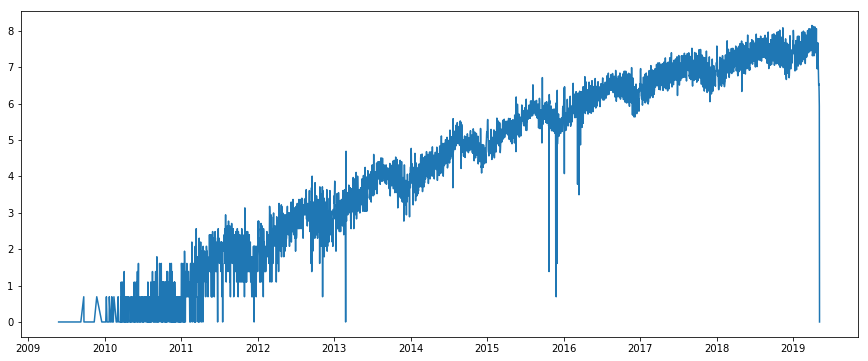

In [16]:
train_logscale=np.log(train)
plt.plot(train_logscale)

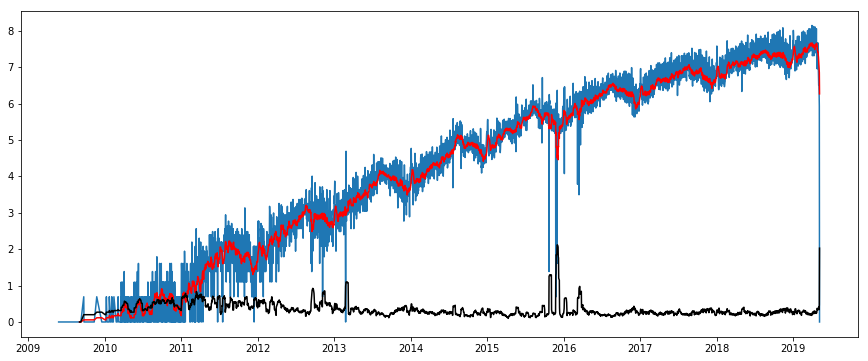

In [17]:
movingaverage=train_logscale.rolling(window=12).mean()
movingSTD=train_logscale.rolling(window=12).std()
plt.plot(train_logscale)
plt.plot(movingaverage,color='red')
plt.plot(movingSTD,'black')

In [18]:
##Method 1
trainLogScaleMinusMovingAverage=train_logscale-movingaverage
trainLogScaleMinusMovingAverage.head(30)
trainLogScaleMinusMovingAverage.dropna(inplace=True)
trainLogScaleMinusMovingAverage.head(20)

,TS
date,
2009-09-03,0.000000
2009-09-08,0.000000
2009-09-09,0.000000
2009-09-23,0.635385
2009-09-24,-0.057762
2009-10-08,-0.057762
2009-10-12,-0.057762
2009-10-19,-0.057762
2009-10-20,-0.057762


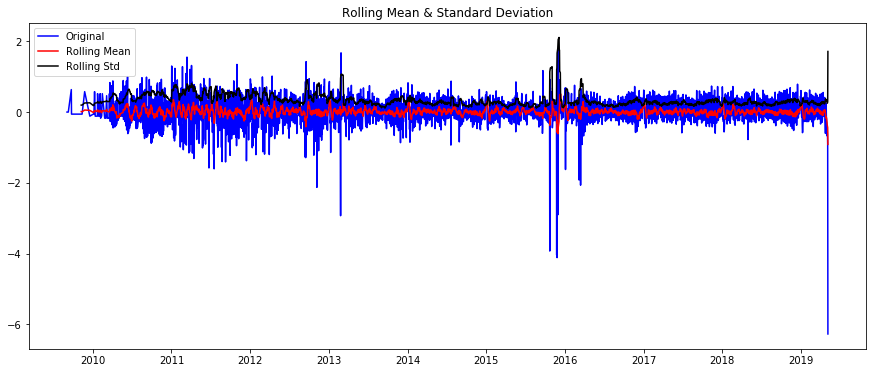

Test Statistic                -9.582250e+00
p-value                        2.142951e-16
# Lags Used                    2.700000e+01
Number of Observations Used    3.250000e+03
Critical Value (1%)           -3.432364e+00
Critical Value (5%)           -2.862430e+00
Critical Value (10%)          -2.567244e+00
dtype: float64


In [19]:
test_stationarity(trainLogScaleMinusMovingAverage)

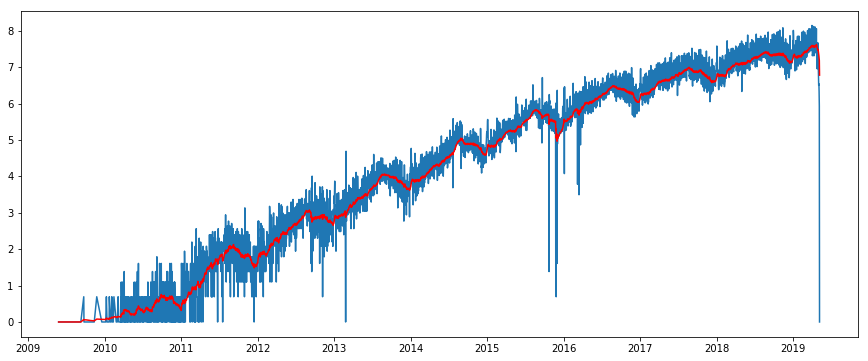

In [20]:
###Method 2
exponentialDecayWeightedAverage=train_logscale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(train_logscale)
plt.plot(exponentialDecayWeightedAverage,color='red')

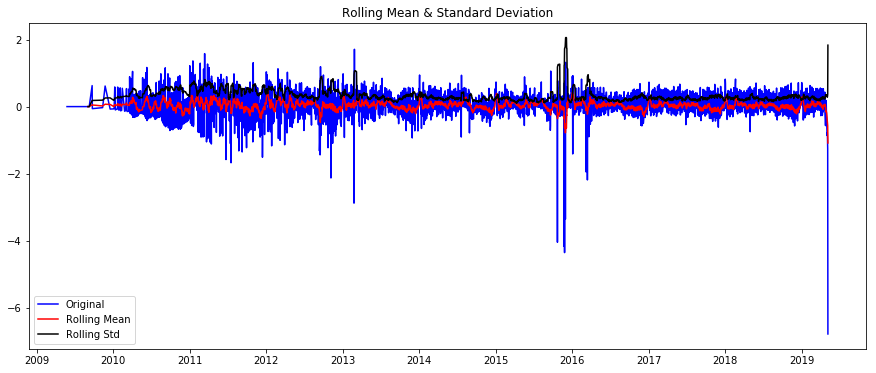

Test Statistic                -6.776698e+00
p-value                        2.559977e-09
# Lags Used                    2.700000e+01
Number of Observations Used    3.261000e+03
Critical Value (1%)           -3.432357e+00
Critical Value (5%)           -2.862427e+00
Critical Value (10%)          -2.567242e+00
dtype: float64


In [21]:
##method 3
train_logscaleMinusexponentialDecayWeightedAverage=train_logscale-exponentialDecayWeightedAverage
train_logscaleMinusexponentialDecayWeightedAverage.dropna(inplace=True)
train_logscaleMinusexponentialDecayWeightedAverage.head(20)
train_logscaleMinusexponentialDecayWeightedAverage.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
test_stationarity(train_logscaleMinusexponentialDecayWeightedAverage)


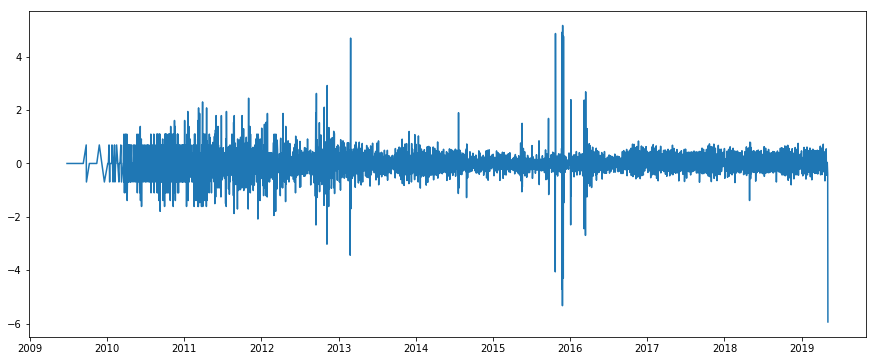

In [22]:
##Method 4
datasetshift=train_logscale-train_logscale.shift()
plt.plot(datasetshift)

In [23]:
datasetshift.dropna(inplace=True)
datasetshift.head(20)

,TS
date,
2009-06-24,0.000000
2009-07-17,0.000000
2009-07-23,0.000000
2009-07-26,0.000000
2009-08-02,0.000000
2009-08-13,0.000000
2009-08-23,0.000000
2009-08-30,0.000000
2009-08-31,0.000000


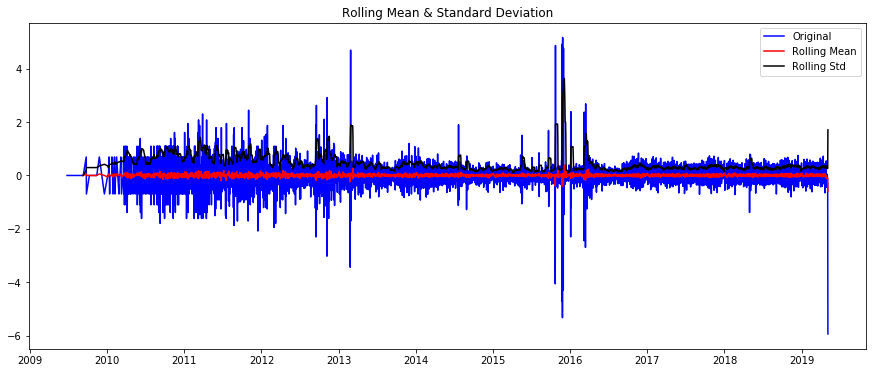

Test Statistic                -1.109059e+01
p-value                        4.091633e-20
# Lags Used                    2.900000e+01
Number of Observations Used    3.258000e+03
Critical Value (1%)           -3.432359e+00
Critical Value (5%)           -2.862428e+00
Critical Value (10%)          -2.567242e+00
dtype: float64


In [24]:
test_stationarity(datasetshift)

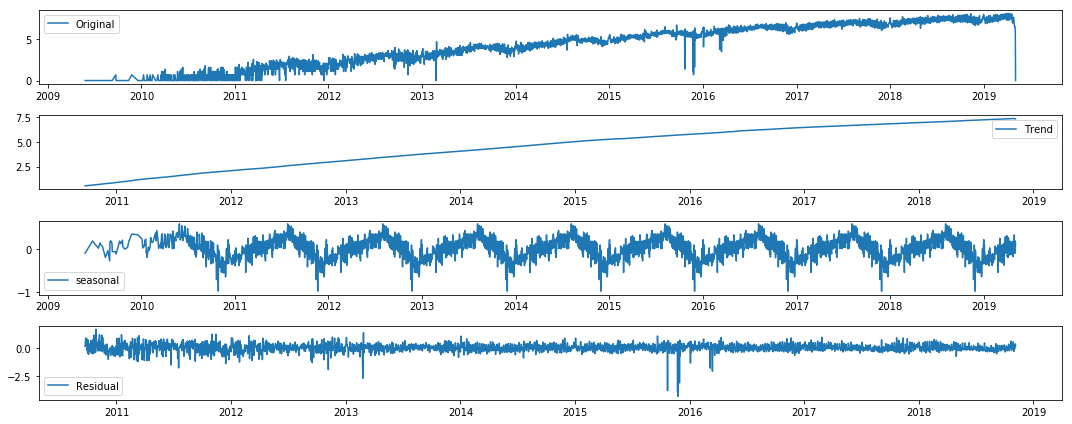

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(train_logscale,freq=365)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid
plt.subplot(411)
plt.plot(train_logscale,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')
plt.tight_layout()


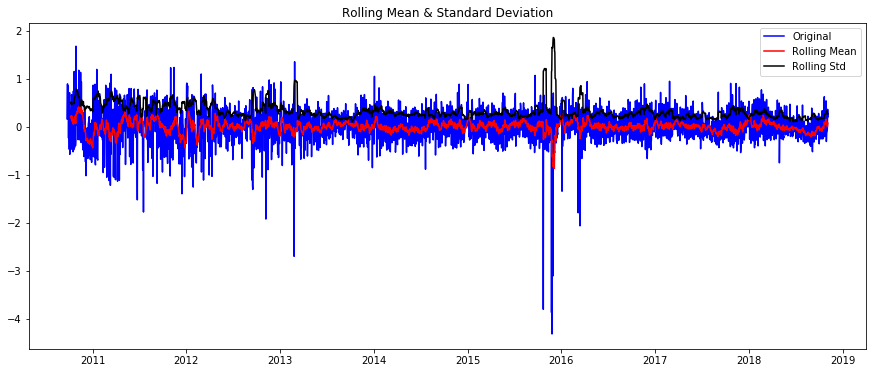

Test Statistic                -9.242008e+00
p-value                        1.573357e-15
# Lags Used                    2.200000e+01
Number of Observations Used    2.902000e+03
Critical Value (1%)           -3.432605e+00
Critical Value (5%)           -2.862536e+00
Critical Value (10%)          -2.567300e+00
dtype: float64


In [26]:
###NOTE: While using fill na use dataframe=dataframe.fillna but while using drop na just use the fucntion df.dropna else it will give you an error
decomposedlogData=residual
decomposedlogData.dropna(inplace=True)
test_stationarity(decomposedlogData)


In [27]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(datasetshift, nlags=20)
lag_pacf = pacf(datasetshift, nlags=20, method='ols')

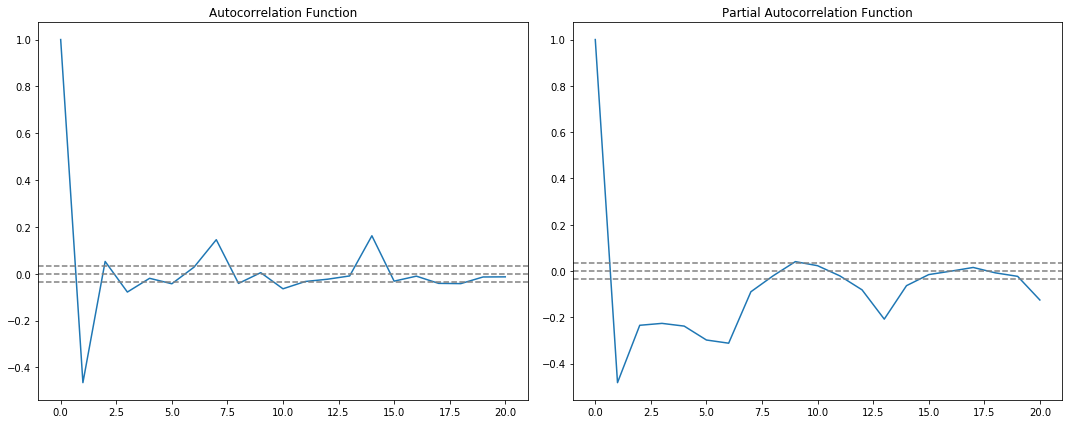

In [28]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetshift)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetshift)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetshift)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetshift)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [29]:
#trainLogScaleMinusMovingAverage = trainLogScaleMinusMovingAverage.asfreq(freq='1D')

/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: nan')

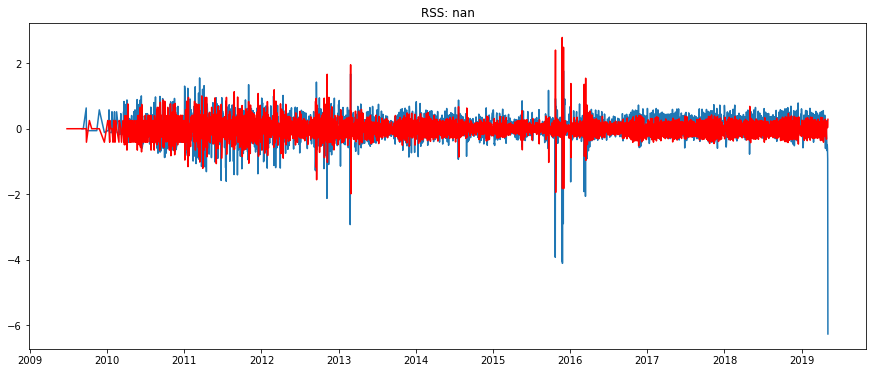

In [30]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_logscale, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(trainLogScaleMinusMovingAverage)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-trainLogScaleMinusMovingAverage['TS'])**2))

In [32]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

date
2009-06-24    0.000834
2009-07-17    0.001236
2009-07-23    0.001525
2009-07-26    0.001525
2009-08-02    0.001525
dtype: float64


In [33]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

date
2009-06-24    0.000834
2009-07-17    0.002069
2009-07-23    0.003594
2009-07-26    0.005119
2009-08-02    0.006644
dtype: float64


In [35]:
predictions_ARIMA_log = pd.Series(train_logscale.ix[0], index=train_logscale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


date
2009-05-26         NaN
2009-06-24    0.000834
2009-07-17    0.002069
2009-07-23    0.003594
2009-07-26    0.005119
dtype: float64

ValueError: Cannot add integral value to Timestamp without freq.

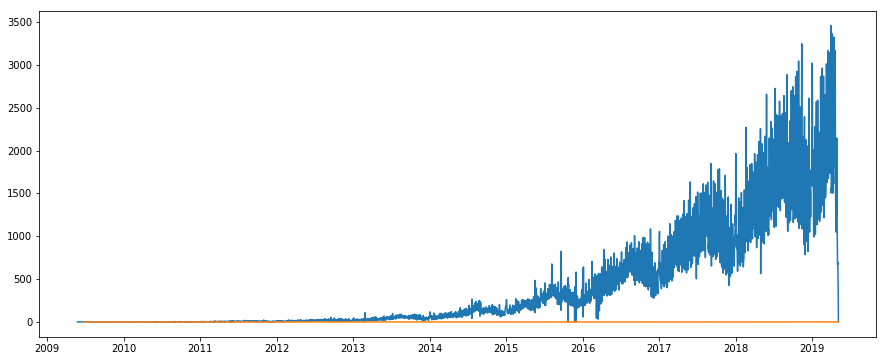

In [38]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(train)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-train)**2)/len(ts)))